<a href="https://colab.research.google.com/github/BoluP0202/Spam_Email-Sorting/blob/main/Spam_detection_based_solely_on_email_content%2C_scratch_that_it_has_now_been_trained_for_subject_and_is_still_fairly_accurate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Imports**



In [2]:
# prompt: import the standard libraries and scikitlearn modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
raw_mail_dataframe = pd.read_csv('/content/spam_assassin.csv')
alt_mail_dataframe = pd.read_csv('/content/Emails.csv')
simple_mail_dataframe = pd.read_csv('/content/mail_data.csv')



In [17]:
# replace Null values with Null strings, there are none but caution
mail_data = raw_mail_dataframe.where(pd.notnull(raw_mail_dataframe),'')
alt_data = alt_mail_dataframe.where(pd.notnull(alt_mail_dataframe), '')
simple_data = simple_mail_dataframe.where(pd.notnull(simple_mail_dataframe), '')
alt_data.value_counts('spam')


spam
0    4360
1    1368
dtype: int64

# **Label Encoding**

In [18]:
#Labelling Spam mail as 0, and ham mail as 1
simple_data.loc[simple_data['Category'] == 'spam', 'Category',] = 1
simple_data.loc[simple_data['Category'] == 'ham', 'Category',] = 0
mail_data.value_counts('target')

target
0    3900
1    1896
dtype: int64

In [19]:
# separating Data into text and labels
cx = mail_data['text']
cy = mail_data['target']
bx = alt_data['text']
by = alt_data['spam']
ax = simple_data['Message']
ay = simple_data['Category']


# **Split Data**

In [20]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
x_train, x_test, y_train, y_test = train_test_split(cx, cy, test_size = 0.2, random_state = 3)

In [21]:
x_test.shape

(1160,)

In [22]:
y_test.shape

(1160,)

# feature Extraction

In [23]:
cx.shape

(5796,)

In [24]:
# Transform data to feature vectrs that can be used as input into the logistic regression
feature_extraction = TfidfVectorizer(min_df = 1, stop_words ='english', lowercase = True)
# read TfIdvectoriser docu

In [25]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [26]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [27]:
y_test.shape

(1160,)

# Training

In [28]:
model = LogisticRegression()

In [29]:
# using training Data
model.fit(x_train_features, y_train)

LogisticRegression()

#Evaluating


In [30]:
# check against training Data
prediction_on_train = model.predict(x_train_features)
accuracy_on_train = accuracy_score(y_train, prediction_on_train)
f1_on_train = f1_score(y_train, prediction_on_train)
recall_on_train = recall_score(y_train, prediction_on_train)
precision_on_train = precision_score(y_train,prediction_on_train)

In [31]:
print('accuracy: ', accuracy_on_train, '\n', 'F1 score:', f1_on_train, '\n', 'Recall:', recall_on_train, '\n','precision', precision_on_train)

accuracy:  0.9857635893011216 
 F1 score: 0.9777478084962913 
 Recall: 0.9615384615384616 
 precision 0.9945130315500685


In [32]:
prediction_on_test = model.predict(x_test_features)
accuracy_on_test = accuracy_score(y_test, prediction_on_test)
f1_on_test = f1_score(y_test, prediction_on_test)
recall_on_test = recall_score(y_test, prediction_on_test)
precision_on_test = precision_score(y_test,prediction_on_test)

In [33]:
print('accuracy: ', accuracy_on_test, '\n', 'F1 score:', f1_on_test, '\n', 'Recall:', recall_on_test,'\n','precision:', precision_on_test)

accuracy:  0.978448275862069 
 F1 score: 0.9669749009247027 
 Recall: 0.9432989690721649 
 precision: 0.991869918699187


In [34]:
alt_features = feature_extraction.transform(raw_mail_dataframe['text'])
prediction_on_alt = model.predict(alt_features)
y_test

17      0
731     0
2331    1
1171    1
2815    0
       ..
192     0
1349    0
2256    0
4618    1
2593    0
Name: target, Length: 1160, dtype: int64

# create predict system

In [35]:
example_mail = mail_data['text'] #simple_mail_dataframe['Message']
mail_data['target']
# ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"] ["Free sweepstakes winnings, do this one thing to enter. click here"]

0       0
1       1
2       1
3       1
4       0
       ..
5791    0
5792    0
5793    1
5794    0
5795    0
Name: target, Length: 5796, dtype: int64

In [36]:
# convert to feature vector
input_data_feat = feature_extraction.transform(example_mail)

#make pred
examprediction = model.predict(input_data_feat)
print(examprediction)
print(prediction_on_test)
print(y_test)
#exaccuracy = accuracy_score(y,examprediction)

h = 0
s = 0
for x in examprediction:
  if x == 0:
    #print('Ham mail')
    h += 1
  else:
   #print('spam mail')
    s += 1

print('we predicted ham: ', h, ' spam: ', s)
#print('we got an accuracy of:', accuracy_example)

[0 1 1 ... 1 0 0]
[0 0 1 ... 0 1 0]
17      0
731     0
2331    1
1171    1
2815    0
       ..
192     0
1349    0
2256    0
4618    1
2593    0
Name: target, Length: 1160, dtype: int64
we predicted ham:  3969  spam:  1827


# Data presented


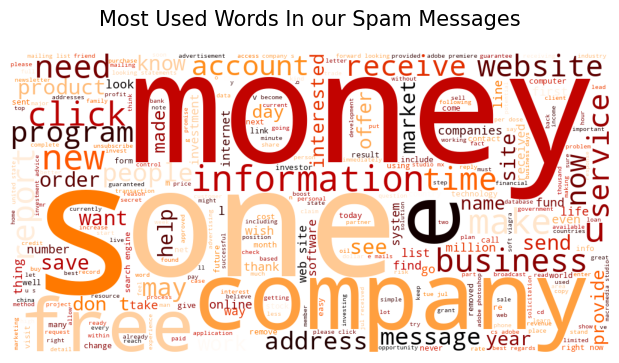

In [37]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
spam_message = alt_data[alt_data['spam']!=0]
# Remove The Stopwords

newset =['Subject', 'u' 'S' 'e','_', 'will', 'email','color', 'arial','esmtp', '3d', 'width', 'br', 'size', 'align', 'height', 'type', 'p', 'href', 'path', 'bgcolor', 'nbsp', 'verdana', 'face', 'helvetica', 'src', 'img', 'charset' 's', 'mail', 'i',"font size", "font face", "tr", "td", "font"]
doggy = STOPWORDS.update(newset)
stopwords = (doggy)
# Iterate Through The Column
for val in spam_message.text:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In our Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

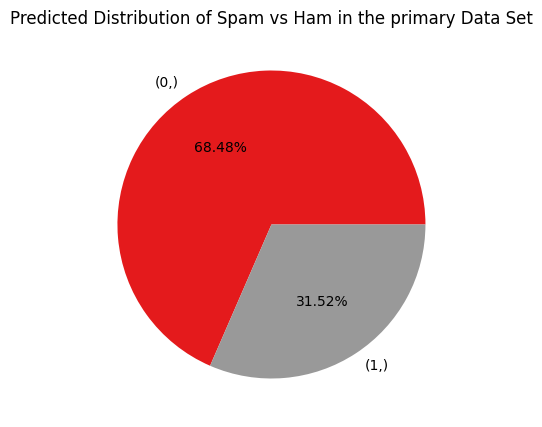

In [38]:
df = pd.DataFrame(examprediction)
#df = df.astype({'df':'string'})
spread = df.value_counts()
plt.rcParams['figure.figsize'] = (5,5)


spread.plot(kind = 'pie', autopct= '%1.2f%%', cmap='Set1')
plt.title(f'Predicted Distribution of Spam vs Ham in the primary Data Set')

plt.show()


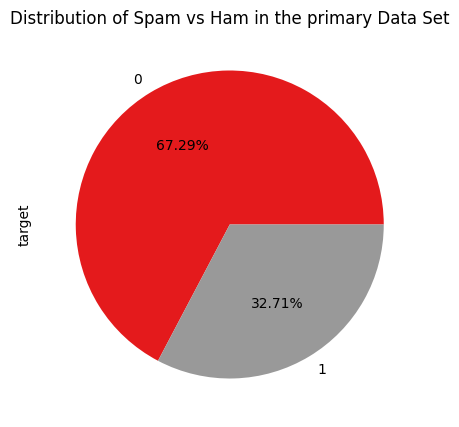

In [39]:
df = pd.DataFrame(examprediction)
spread = cy.value_counts()
plt.rcParams['figure.figsize'] = (5,5)


spread.plot(kind = 'pie', autopct= '%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham in the primary Data Set')

plt.show()

In [40]:
ay.count()
#dfs.value_counts()

5572

In [41]:
FP = 0
FN = 0
TP = 0
TN = 0
spam_entries = []
for x in range(5572):
  if examprediction[x] == cy[x]:
    if examprediction[x] == 1:
      TP += 1
    else:
      TN += 1
  elif examprediction[x] == 1:
    FP += 1
  else:
    FN += 1
print(FP, FN, TP, TN, FP+FN+TP+TN)

for x in range(5572):
  if cy[x] == 1:
    spam_entries.append(x)



corr_pred = TP+TN
wrong_pred = FN+FP
tot_pos = TP+FP
tot_neg = TN+FN
Total = FP+FN+FP+TN
example_accuracy = (TP+TN)/Total
exmaple_precision= TP/(TP+FP)
example_recall = TP/(TP+FN)
print('accuracy:', example_accuracy, 'Precision:', exmaple_precision, 'Recall:', example_recall)
print(Total)

11 79 1745 3737 5572
accuracy: 1.4283480979676915 Precision: 0.9937357630979499 Recall: 0.9566885964912281
3838
